# BindsNET Neuron (Node) Models

## Overview
Detailed documentation of the node creation process has been specified [here](https://bindsnet-docs.readthedocs.io/guide/guide_part_i.html#creating-a-network). This document will go into more specific examples of configuring a spiking neural network in BindsNET.

## Import Statements

In [14]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

from bindsnet.encoding import *
from bindsnet.network import Network
from bindsnet.network.nodes import Input, LIFNodes, IFNodes, SRM0Nodes, AdaptiveLIFNodes
from bindsnet.network.topology import Connection
from bindsnet.network.monitors import Monitor
from bindsnet.network.monitors import NetworkMonitor

from bindsnet.analysis.plotting import plot_spikes, plot_voltages, plot_input, plot_weights

## Neuron Models

### Integrate-and-Fire (IF) Model

Incoming spikes are integrated (added) to the membrane potential.

This model was adapted from http://neuronaldynamics.epfl.ch/online/Ch1.S3.html

---------------------

### Leaky Integrate-and-Fire (LIF) Model

Incoming spikes are integrated (added) to the membrane potential. The membrane potential decrements at each timestep.

This model was adapted from http://icwww.epfl.ch/~gerstner/SPNM/node26.html#SECTION02311000000000000000

---------------------

### Adaptive Leaky Integrate-and-Fire (LIF) / Diehl and Cook Model

Incoming spikes are integrated (added) to the membrane potential. The membrane potential decrements at each timestep. The voltage threshold is increased by some constant each time it spikes. Otherwise, it decays back to its default value.

---------------------

### Spike Response Model 0 (SRM0)

Incoming spikes are integrated (added) to the membrane potential. The membrane potential decrements at each timestep.

This model was adapted from https://intranet.physio.unibe.ch/Publikationen/Dokumente/Vasilaki2009PloSComputBio_1.pdf

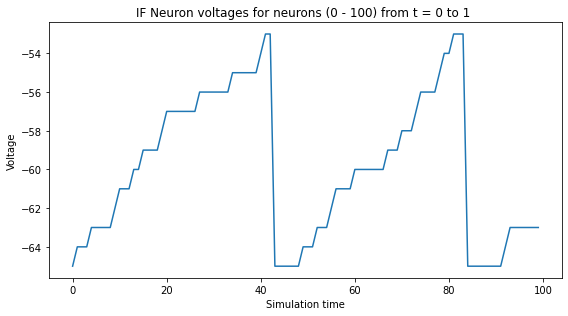

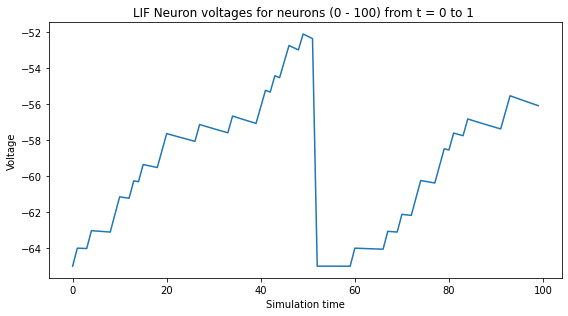

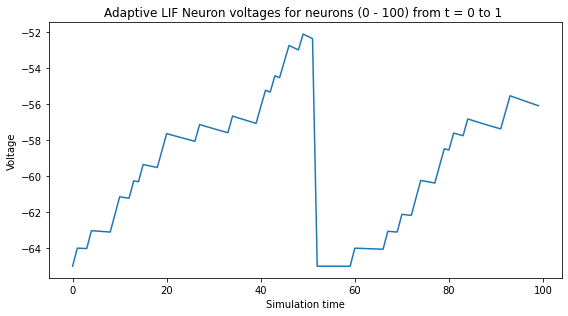

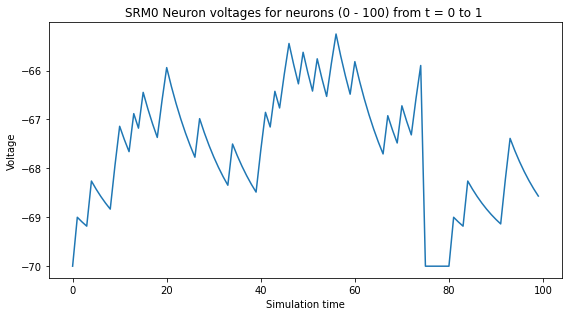

In [18]:
# initialize network
network = Network()
network = Network()

# set number of neurons
num_inputs = 1
num_neurons = 1

# simulation time
time = 100
dt = 1

# configure weights for the synapses between the input layer and LIF layer
w = torch.round(torch.abs(2 * torch.randn(num_inputs, num_neurons)))

# create input spike data, where each spike is distributed according to Bernoulli(0.1)
input_data = torch.bernoulli(0.3 * torch.ones(time, num_inputs)).byte()
inputs = {"Input Layer": input_data}

# initialize list of neuron models
neuron_models = [IFNodes(n=num_neurons),LIFNodes(n=num_neurons),AdaptiveLIFNodes(n=num_neurons),SRM0Nodes(n=num_neurons)]
neuron_types = ["IF Neuron","LIF Neuron","Adaptive LIF Neuron","SRM0 Neuron"]
spikes={}
voltages={}

s_ims = None
s_axes = None
v_ims = None
v_axes = []

for neuron_model_index in range(len(neuron_models)):
    # initialize input and neuron layers
    input_layer = Input(n=num_inputs)
    neuron_layer = neuron_models[neuron_model_index]

    # connection between the input layer and the LIF layer
    connection = Connection(
        source=input_layer, target=neuron_layer,w=w
    )

    # create a monitor
    neuron_layer_monitor = Monitor(
        obj=neuron_layer,
        state_vars=("s", "v"),  # Record spikes and voltages.
        time=time,  # Length of simulation (if known ahead of time).
    )

    # add layers to network
    network.add_layer(
        layer=input_layer, name="Input Layer"
    )
    network.add_layer(
        layer=neuron_layer, name="Neuron Layer"
    )


    # add connection to network
    network.add_connection(
        connection=connection, source="Input Layer", target="Neuron Layer"
    )

    # add monitor to the network
    network.add_monitor(monitor=neuron_layer_monitor, name="Neuron Layer")

    # simulate network on input data
    network.run(inputs=inputs, time=time)

    # retrieve and plot simulation spike, voltage data from monitors
    v_axes = plot_voltages({neuron_types[neuron_model_index] : neuron_layer_monitor.get("v")}, plot_type="line",axes=v_axes)


plt.show()